# <font color=green>Data rocess</font> 
In this tutorial, we will be merging and assimilating the data. This step is important because the initial data format is different and we need to standardise the format for use in the later *Model Ensemble Mean*. A new pakage will help us with these:

**PYTHON-CDO:** Climate Data Operators (CDO) is a collection of command line Operators to manipulate and analyse Climate and NWP model Data. More information is available on the https://code.mpimet.mpg.de/projects/cdo.

## <font color=green>1 Download pakage

In [2]:
pip install cdo

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for cdo: filename=cdo-1.5.6-py3-none-any.whl size=10162 sha256=7ea19612305d1933ddfd124a6fbead7827f1342f9773356ec1d7e4cef8ae25bc
  Stored in directory: /home/users/ruoou/.cache/pip/wheels/5f/f7/a2/91a7efc10d29c94d76eb0f37335caa90bf7284547171742958
Successfully built cdo
Note: you may need to restart the kernel to use updated packages.


## <font color=green>2 Import pakages

In [2]:
import xarray as xr

# python-cdo import method
from cdo import Cdo
from cdo import *
cdo = Cdo()

## <font color=green>3 Merge nc files
Using the ssp126 scenario as an example, we downloaded the following sample of raw data from the CMIP6 database (https://esgf-node.llnl.gov/search/cmip6/).

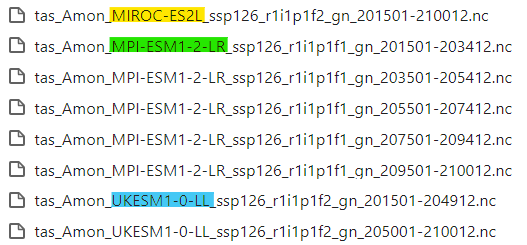

The same monthly global near-surface temperature data for 2015-2100 may have been split into several data for different models, so we have to merge files in multi-time (`cdo.mergetime`) for each model.

In [ ]:
# merge files in multi-time
cdo.mergetime(input = '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas/*CESM2*.nc', output= '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/tas_Amon_CESM2_ssp126_r4i1p1f1_gn_201501-210012.nc')
cdo.mergetime(input = '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas/*MPI*.nc', output= '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/tas_Amon_MPI-ESM1-2-LR_ssp126_r1i1p1f1_gn_201501-210012.nc')
cdo.mergetime(input = '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas/*EC*.nc', output= '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/tas_Amon_EC-Earth3-Veg_ssp126_r1i1p1f1_gr_201501-210012.nc')
cdo.mergetime(input = '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas/*UKESM*.nc', output= '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_201501-210012.nc')

In [4]:
# make a list of all the models
models_list = ['BCC', 'MPI', 'EC', 'CanESM5', 'CNRM', 'CESM2', 'UKESM1', 'MIROC', 'IPSL']

Then, We should print all the model metadata to define the minimal grid as our target grid.

In [13]:
# check metadata
for mod in models_list:
    print (xr.open_mfdataset('/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/*' + mod +'*.nc', parallel=True))

<xarray.Dataset>
Dimensions:    (time: 1032, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(160, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(320, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(1032, 160, 320), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2015.0
    comment:                This is an extension 

Once we selected the target grid, print its grid information (`cdo.griddes`).

In [31]:
# check grid information
cdo.griddes(input = '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/tas_Amon_MIROC-ES2L_ssp126_r1i1p1f2_gn_201501-210012.nc')

['#',
 '# gridID 1',
 '#',
 'gridtype  = gaussian',
 'gridsize  = 8192',
 'xsize     = 128',
 'ysize     = 64',
 'xname     = lon',
 'xlongname = "Longitude"',
 'xunits    = "degrees_east"',
 'yname     = lat',
 'ylongname = "Latitude"',
 'yunits    = "degrees_north"',
 'numLPE    = 32',
 'xfirst    = 0',
 'xinc      = 2.8125',
 'xbounds   = -1.40625 1.40625',
 '1.40625 4.21875',
 '4.21875 7.03125',
 '7.03125 9.84375',
 '9.84375 12.65625',
 '12.65625 15.46875',
 '15.46875 18.28125',
 '18.28125 21.09375',
 '21.09375 23.90625',
 '23.90625 26.71875',
 '26.71875 29.53125',
 '29.53125 32.34375',
 '32.34375 35.15625',
 '35.15625 37.96875',
 '37.96875 40.78125',
 '40.78125 43.59375',
 '43.59375 46.40625',
 '46.40625 49.21875',
 '49.21875 52.03125',
 '52.03125 54.84375',
 '54.84375 57.65625',
 '57.65625 60.46875',
 '60.46875 63.28125',
 '63.28125 66.09375',
 '66.09375 68.90625',
 '68.90625 71.71875',
 '71.71875 74.53125',
 '74.53125 77.34375',
 '77.34375 80.15625',
 '80.15625 82.96875',
 '82.9

Then, We paste the information above to an new text file, which is our target grid file.  


## <font color=green>4 Regrid data
use the gridfile as the target grid file and remap the data (`cdo.remapbil`).

In [45]:
# regrid
for mod in models_list:
    cdo.remapbil('/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/gridfile.txt', input= '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/*'+ mod + '*.nc', output= '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/'+ mod + '_remap.nc')

## <font color=green>5 obtain the ensemble mean data
(`cdo.ensmean`)

In [47]:
# ensemble mean
nc_ensmean = cdo.ensmean(input = '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/*_remap.nc', output = '/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/nc_ensmean.nc')

check the ensemble mean data

In [50]:
# read data
dset = xr.open_dataset('/home/users/ruoou/projects/data/cmip6/scenaromip/ssp126/tas_single/nc_ensmean.nc', parallel=True)
dset

<xarray.Dataset>
Dimensions:    (time: 1032, bnds: 2, lon: 128, lat: 64)
Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat        (lat) float64 87.86 85.1 82.31 79.53 ... -82.31 -85.1 -87.86
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(1032, 64, 128), meta=np.ndarray>
Attributes: (12/51)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    history:                Thu Apr 07 01:00:18 2022: cdo -O -s -ensmean /hom...
    source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
    institution:            Beijing Climate Center, Beijing 100081, China
    activity_id:            ScenarioMIP
    ...                     ...
    tracking_id:            hdl:21.14100/378373ed-a6ac-46dc-b13b-2d59c11b6391
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by BCC is licensed unde...
    cmor_version:           3.3.2
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...